# Import pandas

In [37]:
import pandas as pd

file_path = r"C:\Users\tejap\Downloads\un-general-debates-blueprint (1).csv"  # Use raw string for path
df = pd.read_csv(file_path)
print(df.head(20))  # Print the first 20 rows



    session  year country                     country_name  \
0        25  1970     ALB                          Albania   
1        25  1970     ARG                        Argentina   
2        25  1970     AUS                        Australia   
3        25  1970     AUT                          Austria   
4        25  1970     BEL                          Belgium   
5        25  1970     BLR                          Belarus   
6        25  1970     BOL  Bolivia, Plurinational State of   
7        25  1970     BRA                           Brazil   
8        25  1970     CAN                           Canada   
9        25  1970     CMR                         Cameroon   
10       25  1970     COG                            Congo   
11       25  1970     COL                         Colombia   
12       25  1970     CRI                       Costa Rica   
13       25  1970     CUB                             Cuba   
14       25  1970     DOM               Dominican Republic   
15      

# import nltk for stop words

In [38]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'wasn', "hadn't", 'such', 'to', 'it', 'doesn', 'and', 'be', 'am', 'ain', 'should', 'can', 'haven', 'yours', 'down', "you've", 'theirs', 'through', 'again', 's', "you'd", 'before', 'll', 'any', 'some', 'i', 'whom', 'isn', "mightn't", 'these', 'y', "didn't", 'having', 'where', 'until', 'ma', 'as', 'so', 'yourself', 'for', 'will', 'own', 'further', 'most', 'have', 'between', 'his', "should've", 'weren', "that'll", 'mustn', 'below', 'they', 'their', 'didn', 'no', 'because', "don't", 'are', "shan't", 'other', 'hasn', 'the', 'those', 'shan', 'over', 'at', 'very', 'were', "isn't", "shouldn't", 'into', 'mightn', "wasn't", 'that', 'out', 'on', 'after', 'off', 'each', 'by', 'we', 'did', "weren't", 'my', 'themselves', "aren't", "couldn't", 'you', "mustn't", 'which', 'now', 't', 'him', 'above', 'them', 'itself', 'just', "needn't", 'what', 'same', "you'll", 'why', 'up', 'yourselves', 'your', 've', 'o', 'won', 'this', 'in', 'few', 're', 'do', 'while', 'hers', 'he', 'of', 'nor', "it's", 'when', 'who

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import regex and creating pipeline

In [39]:
import regex as re #importing regex

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline) # apply pipeline


# Import counter

In [40]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


# Importing word cloud

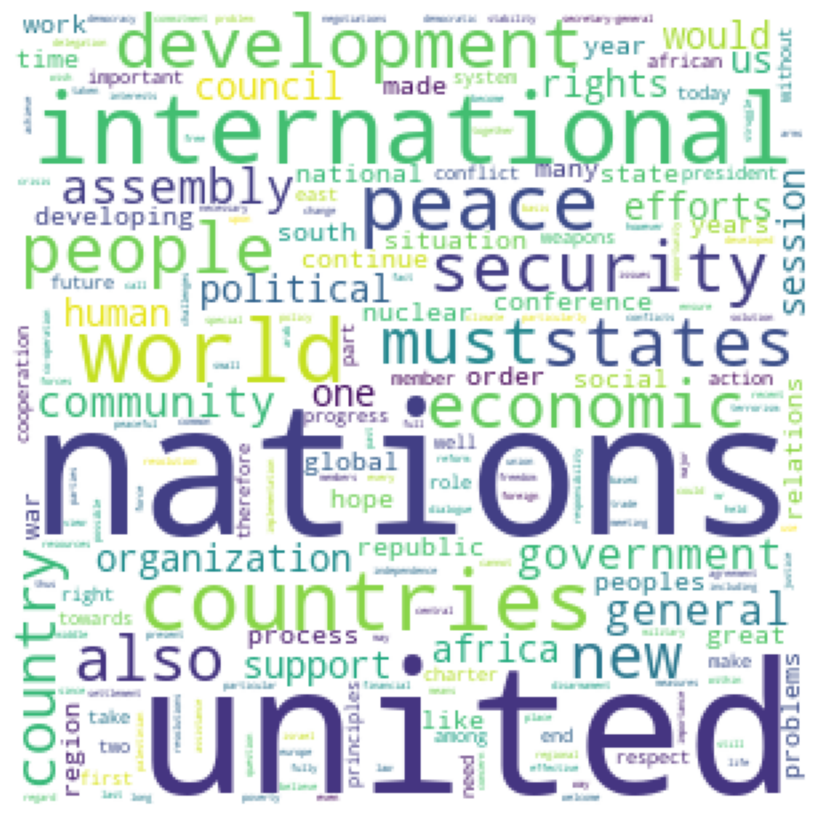

In [41]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Create data frame

In [42]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [43]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


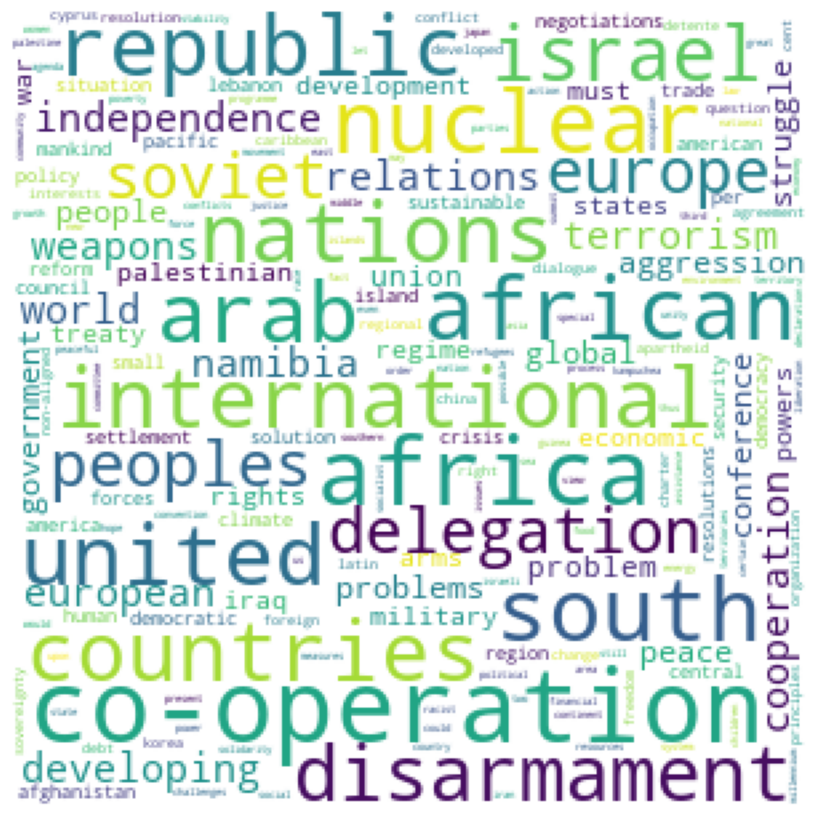

In [44]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Count tokens

In [45]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [46]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


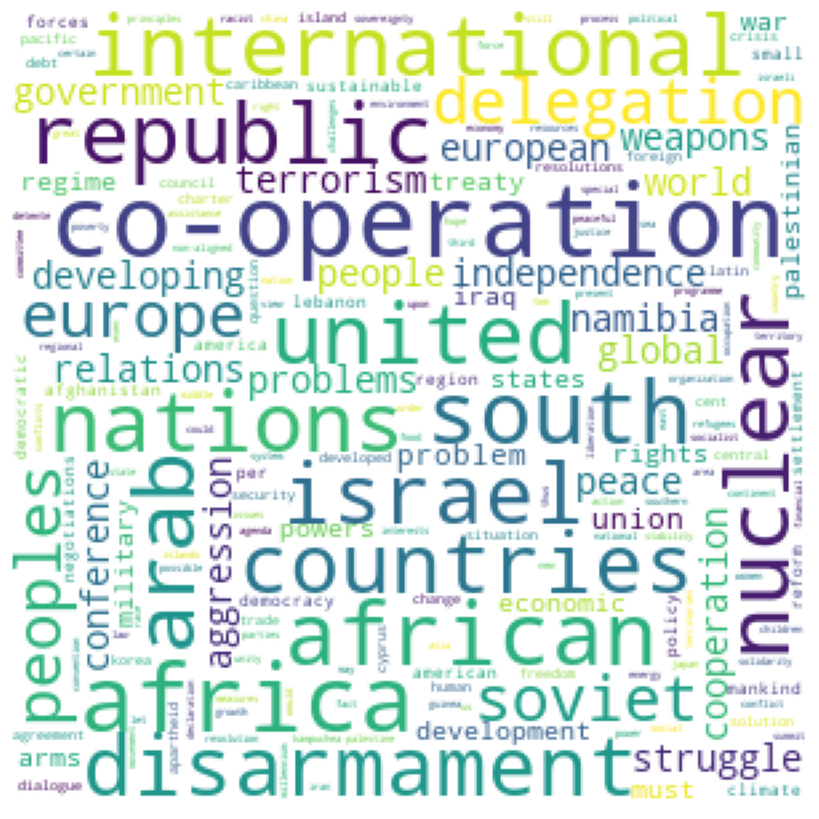

In [27]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [47]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [48]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

# Compute relative frequencies 

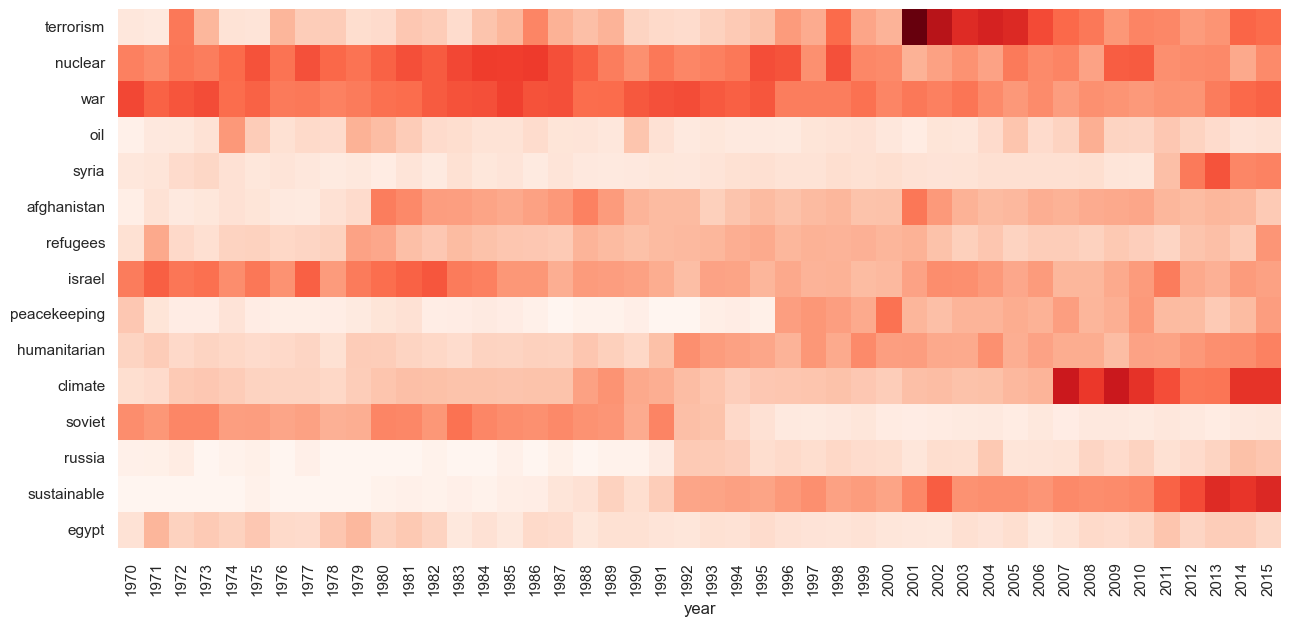

In [49]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)